# **Alex's Journal**

**Best Neighborhood in Pittsburgh**: *to be determined*

<u>Metric</u>: Best place to own in dog in Pittsburgh

<u>Databases</u>: *Licenses(mine)*, Supermarkets(Daniel), Housing(Nhu)

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dl = pd.read_csv("DogLicenses.csv", index_col = "DogName")

In [11]:
dl.sample(5)

,LicenseType,Breed,Color,OwnerZip,ExpYear,ValidDate
DogName,,,,,,
SUMMER,Dog Lifetime Spayed Female,MIXED,WHITE,15044,2099,2014-10-16T14:07:39
FAWN,Dog Senior Lifetime Spayed Female,BLACK&TAN COONHOUND,BLACK/BROWN,15084,2099,2017-02-08T15:35:38
TITAN,Dog Senior Lifetime Neutered Male,DOBERMAN PINSCHER,BLACK/TAN,15238,2099,2013-08-02T14:19:19
JAKE,Dog Senior Lifetime Neutered Male,GER SHORTHAIR POINT,SPOTTED,15090,2099,2019-01-22T15:12:07
FINN,Dog Lifetime Neutered Male,CAV KING CHAR SPANI,WHITE/BROWN,15090,2099,2015-08-11T09:34:08


The  Dog Licenses database is downloaded and stored as dl. The .head() method was to view the dataset and how the information appears with the column as owner zip codes in a random sample.

In [12]:
dl.describe()

,OwnerZip,ExpYear
count,36633.000000,36633.0
mean,15155.909399,2099.0
std,285.835365,0.0
min,15003.000000,2099.0
25%,15101.000000,2099.0
50%,15137.000000,2099.0
75%,15228.000000,2099.0
max,47909.000000,2099.0


The describe method was used to see an overall of all of the data in the database.

In [20]:
city_zips = [15201, 15203, 15204, 15205, 15206, 15207, 15208, 15210, 15211,
            15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220,
            15221, 15222, 15224, 15226, 15227, 15230, 15232, 15233, 15234,
            15235]
len(city_zips)

28

Creates a list of city zip codes and names as city_zip with the 28 zip codes.

In [23]:
query_mask201 = dl['OwnerZip'] == 15201
query_mask203 = dl['OwnerZip'] == 15203
query_mask204 = dl['OwnerZip'] == 15204
query_mask205 = dl['OwnerZip'] == 15205
query_mask206 = dl['OwnerZip'] == 15206
query_mask207 = dl['OwnerZip'] == 15207
query_mask208 = dl['OwnerZip'] == 15208
query_mask210 = dl['OwnerZip'] == 15210
query_mask211 = dl['OwnerZip'] == 15211
query_mask212 = dl['OwnerZip'] == 15212
query_mask213 = dl['OwnerZip'] == 15213
query_mask214 = dl['OwnerZip'] == 15214
query_mask215 = dl['OwnerZip'] == 15215
query_mask216 = dl['OwnerZip'] == 15216
query_mask217 = dl['OwnerZip'] == 15217
query_mask218 = dl['OwnerZip'] == 15218
query_mask219 = dl['OwnerZip'] == 15219
query_mask220 = dl['OwnerZip'] == 15220
query_mask221 = dl['OwnerZip'] == 15221
query_mask222 = dl['OwnerZip'] == 15222
query_mask224 = dl['OwnerZip'] == 15224
query_mask226 = dl['OwnerZip'] == 15226
query_mask227 = dl['OwnerZip'] == 15227
query_mask230 = dl['OwnerZip'] == 15230
query_mask233 = dl['OwnerZip'] == 15233
query_mask234 = dl['OwnerZip'] == 15234 
query_mask235 = dl['OwnerZip'] == 15235

query_mask235.head(15)

DogName
SASHA              False
JAKE               False
SHILOH             False
BLONDIE            False
SASHA              False
CODY               False
CHARLIE            False
COLT               False
CANDY              False
KEENA               True
AMOS               False
BEAR               False
MADISON            False
TENNESEE TUXEDO    False
HOLLY              False
Name: OwnerZip, dtype: bool

Attempt at trying to filter out zip codes using 28 separate query masks and then attempting to combine them in the next code cell.

In [ ]:
def combine(ulist, query_mask, index):
    for i in query_mask:
        ulist.insert(query_mask[i], index)
        index += 1
        
    return index

index = 0
city_dogs = []
index = combine(city_dogs, query_mask201, index)

This piece was meant to combine the query masks with the combine method accepting list that will result in all query masks being contained within it, the query mask being added currently, and the index of the combined list that currently can be added to.
Code cell results in "DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ulist.insert(query_mask[i], index)"
  
The code itself takes a longer time to run and will eventually cause an error so method was scrapped for more effective one.

In [12]:
dl.groupby("OwnerZip").count()

,LicenseType,Breed,Color,ExpYear,ValidDate
OwnerZip,,,,,
15003,31,31,31,31,31
15005,48,48,48,48,48
15006,7,7,7,7,7
15007,9,9,9,9,9
15012,3,3,3,3,3
...,...,...,...,...,...
16342,1,1,1,1,1
32081,1,1,1,1,1
33426,1,1,1,1,1


When filtered by owner zipcode, the data is presented like this.

In [22]:
def filter_zips(grouped):
    for i in city_zips:
        if grouped.iloc[0,3] == i:
            return True
    return False
    
pitt_zips = dl.groupby("OwnerZip").filter(filter_zips)
pitt_zips.sample(20)

,LicenseType,Breed,Color,OwnerZip,ExpYear,ValidDate
DogName,,,,,,
CHLOE,Dog Lifetime Spayed Female,SCHNAUZER MIN,BLACK WITH WHITE,15235,2099,2016-12-05T12:45:11
DEWEY,Dog Lifetime Duplicate,GER SHEPHERD MIX,BLACK,15214,2099,2017-01-20T16:19:09
MOLLY,Dog Lifetime Spayed Female,GOLDEN RETRIEVER,GOLD,15235,2099,2009-11-12T14:02:30
SPARKY,Dog Senior Lifetime Neutered Male,BEAGLE MIX,SPOTTED,15227,2099,2016-01-28T14:44:26
CHARLEY,Dog Senior Lifetime Neutered Male,CAV KING CHAR SPANI,BLACK/BROWN,15235,2099,2018-02-14T15:15:59
WILL,Dog Senior Lifetime Neutered Male,MIXED,BROWN,15235,2099,2011-10-17T14:54:43
MARGO,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,15235,2099,2017-03-02T11:33:22
DARTANYON,Dog Lifetime Neutered Male,BEAGLE,MULTI,15221,2099,2010-11-15T14:46:02
JENNY,Dog Lifetime Spayed Female,BICHON FRISE,WHITE,15235,2099,2004-02-17T00:00:00


More effective way of filtering out non-city zip codes using filter function and list with only zip codes.  The .sample() method shows a random sample of the new function with only city zip codes.

In [24]:
pitt_zips["OwnerZip"].unique()

array([15235, 15215, 15221, 15216, 15227, 15220, 15234, 15218, 15205,
       15233, 15214, 15210, 15226, 15201, 15212, 15222, 15217, 15208,
       15207, 15219, 15203, 15232, 15206, 15213, 15224, 15204, 15230,
       15211])

In [35]:
pitt_zips["OwnerZip"].value_counts()

15235    1233
15227    1120
15221     500
15205     434
15234     407
15216     337
15215     325
15218     276
15220     235
15214     156
15212      79
15210      70
15226      39
15207      12
15219      12
15217       9
15208       7
15206       6
15201       5
15233       5
15232       5
15203       4
15222       3
15224       2
15213       2
15211       2
15204       1
15230       1
Name: OwnerZip, dtype: int64

.unique() is used to show all of the city zip codes that are present in the dataset.
.value_counts displays how many licenses have been issued in each address with 15235 appearing to have the highest and 15230 and 152304 appearing to have the lowest recorded.

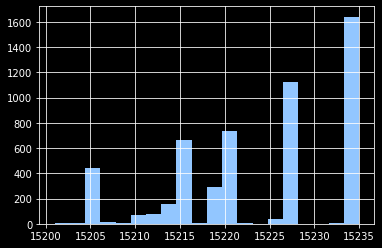

In [34]:
plt.style.use('seaborn-pastel')
pitt_zips['OwnerZip'].hist(bins=20)

Histogram showing the zip codes in the city of Pittsburgh on the x-axis and the number of dog licenses presented on the y-axis.  We can see that higher numbered zip codes generally have higher numbers of dog licenses.